In [123]:
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
import pandas as pd
import configparser
import psycopg2




In [124]:
config = configparser.ConfigParser()
config.read('dwh.cfg')
    
print('Config file read.')
    


Config file read.


In [125]:
conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))
cur = conn.cursor()
print('Connected to database.')

Connected to database.


In [126]:
# Display schema

query = """
select * from pg_namespace;
"""

pd.read_sql(query, conn)

,nspname,nspowner,nspacl
0,pg_toast,1,None
1,pg_internal,1,None
2,pg_temp_1,1,None
3,pg_catalog,1,"{rdsdb=UC/rdsdb,=U/rdsdb}"
4,public,1,"{rdsdb=UC/rdsdb,=UC/rdsdb}"
5,information_schema,1,"{rdsdb=UC/rdsdb,=U/rdsdb}"


In [127]:
# Display Tables

query = """
select distinct(tablename) from pg_table_def
where schemaname = 'public';
"""

pd.read_sql(query, conn)

,tablename
0,artists
1,songplays
2,songs
3,staging_events
4,staging_songs
5,time
6,users


In [ ]:
# display 

In [128]:
# table_info AWS
query = """
select "table", encoded, diststyle, sortkey1, skew_sortkey1, skew_rows
from svv_table_info
order by 1;
"""

pd.read_sql(query, conn)


,table,encoded,diststyle,sortkey1,skew_sortkey1,skew_rows
0,artists,Y,AUTO(EVEN),None,None,None
1,songplays,Y,AUTO(EVEN),None,None,None
2,songs,Y,AUTO(EVEN),None,None,None
3,staging_events,Y,AUTO(ALL),None,None,None
4,staging_songs,Y,AUTO(EVEN),None,None,None
5,time,Y,AUTO(EVEN),None,None,None
6,users,Y,AUTO(EVEN),None,None,None


## Examine tables

In [129]:
query = """
select *
from users
order by user_id desc
limit 20;
"""
pd.read_sql(query, conn)

,user_id,first_name,last_name,gender,level
0,101,Jayden,Fox,M,free
1,100,Adler,Barrera,M,free
2,99,Ann,Banks,F,free
3,98,Jordyn,Powell,F,free
4,97,Kate,Harrell,F,paid
5,96,Cierra,Finley,F,free
6,95,Sara,Johnson,F,paid
7,94,Noah,Chavez,M,free
8,92,Ryann,Smith,F,free
9,91,Jayden,Bell,M,free


In [130]:
query = """
select *
from songplays
order by songplay_id desc
limit 20;
"""
pd.read_sql(query, conn)

,songplay_id,start_time,user_id,level,song_id,artist_id,session_id,location,user_agent
0,423,2018-11-15 11:39:32,30,paid,SOULTKQ12AB018A183,ARKQQZA12086C116FC,324,"San Jose-Sunnyvale-Santa Clara, CA",Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...
1,415,2018-11-24 05:50:21,88,paid,SODGSFW12A8C1337FB,ARA45QA1187FB40E80,888,"Sacramento--Roseville--Arden-Arcade, CA","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4..."
2,407,2018-11-19 07:11:29,24,paid,SOIOESO12A6D4F621D,ARVLXWP1187FB5B94A,672,"Lake Havasu City-Kingman, AZ","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK..."
3,399,2018-11-30 04:57:03,49,paid,SOEMXXF12A6D4F932C,ARI4S0E1187B9B06C0,1079,"San Francisco-Oakland-Hayward, CA",Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...
4,391,2018-11-05 04:47:26,69,free,SONTFNG12A8C13FF69,AR52EZT1187B9900BF,259,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4..."
5,383,2018-11-24 04:34:19,88,paid,SOLAYSZ12A6701F5BE,ARVHQNN1187B9B9FA3,888,"Sacramento--Roseville--Arden-Arcade, CA","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4..."
6,375,2018-11-29 17:49:47,75,free,SOAOXTT12AB0182E23,AROSIKT1187B9A4D53,721,"Columbia, SC","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3..."
7,367,2018-11-22 17:18:20,83,free,SOSJEEG12A6BD5571F,AR8RQVM1187B9A2645,772,"Lubbock, TX","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4..."
8,365,2018-11-22 13:21:21,63,free,SOLWQQJ12A8C13A2BD,ARDOL0J1187B9AC52A,785,"Santa Rosa, CA","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4..."
9,359,2018-11-19 16:26:36,24,paid,SORKDUM12A6D4FA813,ARYKVZI1187B9AE8A9,723,"Lake Havasu City-Kingman, AZ","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK..."


## Analyze DWH

In [132]:
query = """
select artists.name,
       temp.count_songplays
  from (select artist_id,
               count(songplay_id) as count_songplays
          from songplays
         group by artist_id) as temp
  left join artists
    on temp.artist_id = artists.artist_id
    WHERE artists.name IS NOT NULL
 order by temp.count_songplays desc
 limit 10;
"""

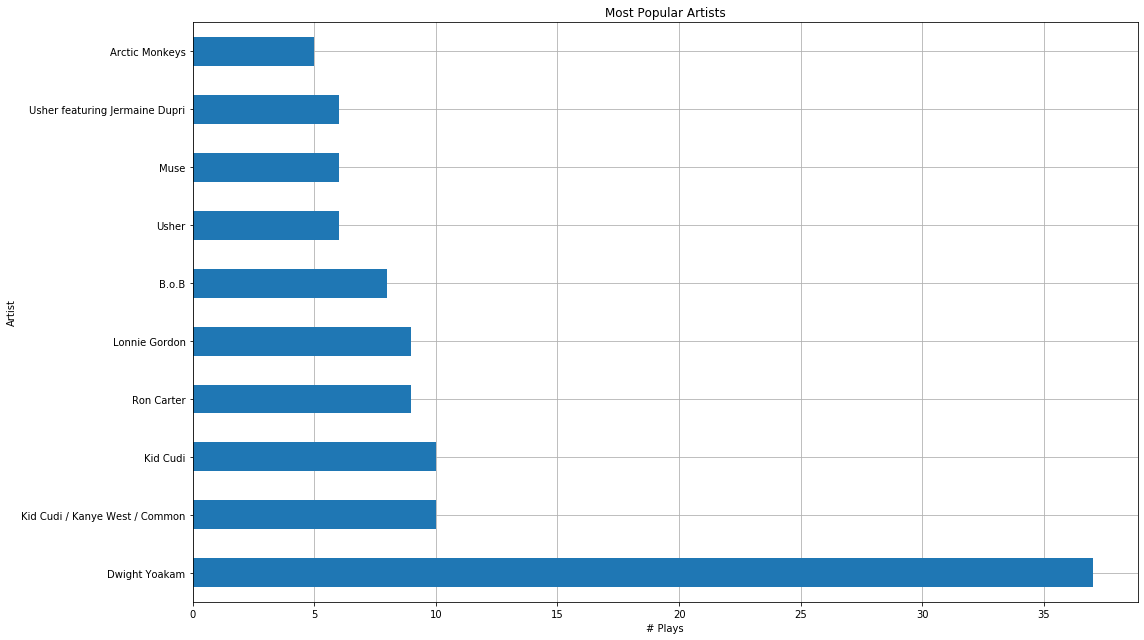

In [133]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()

pd.read_sql(query, conn).plot(kind="barh", x="name", legend=None, ax=ax, zorder=2)
ax.grid(True, zorder=0)
ax.set_xlabel("# Plays")
ax.set_ylabel("Artist")
ax.set_title("Most Popular Artists")

plt.tight_layout()
plt.savefig("../most_popular_artists.png", dpi=120)

In [134]:
query = """
select songs.title || ',\n' || artists.name as song_artist,
       temp.count_songplays
  from (select song_id,
               count(songplay_id) as count_songplays
          from songplays
         group by song_id) as temp
  left join songs
  on temp.song_id = songs.song_id
  left join artists
  on songs.artist_id = artists.artist_id

  order by temp.count_songplays desc
  limit 10;
"""

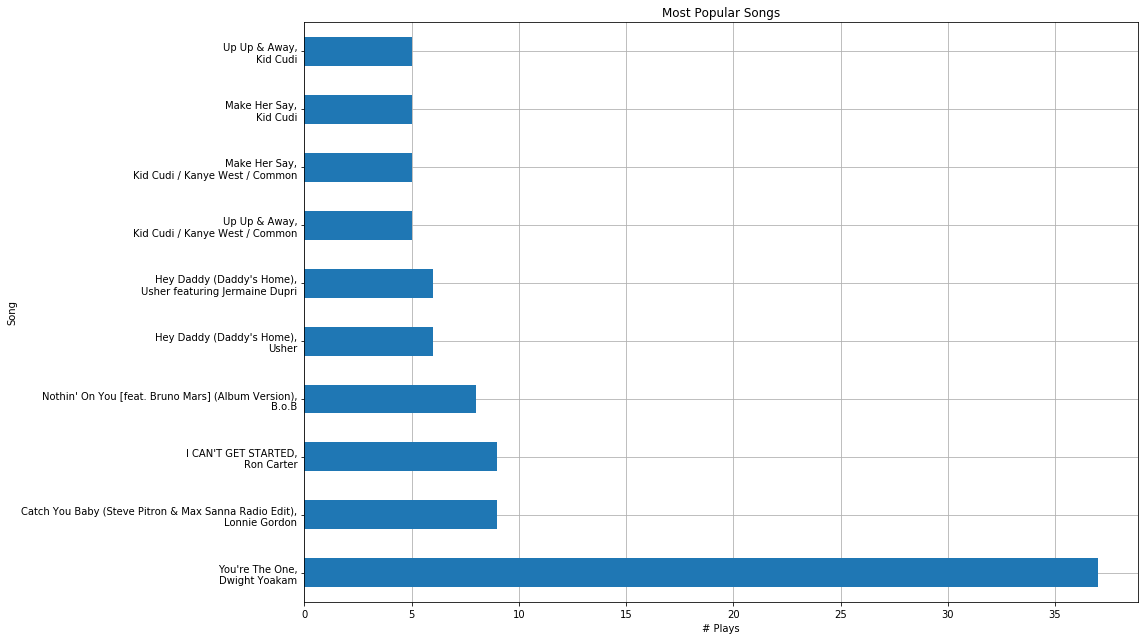

In [119]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()

pd.read_sql(query, conn).plot(kind="barh", x="song_artist", legend=None, ax=ax, zorder=2)
ax.grid(True, zorder=0)
ax.set_xlabel("# Plays")
ax.set_ylabel("Song")
ax.set_title("Most Popular Songs")

plt.tight_layout()
plt.savefig("../most_popular_songs.png", dpi=120)

In [136]:
query = """
select users.gender || ', ' || users.level as gender_level,
       count(songplays.songplay_id)
  from songplays
  left join users
    on songplays.user_id = users.user_id
 group by users.gender, users.level
 order by users.gender, users.level;
"""

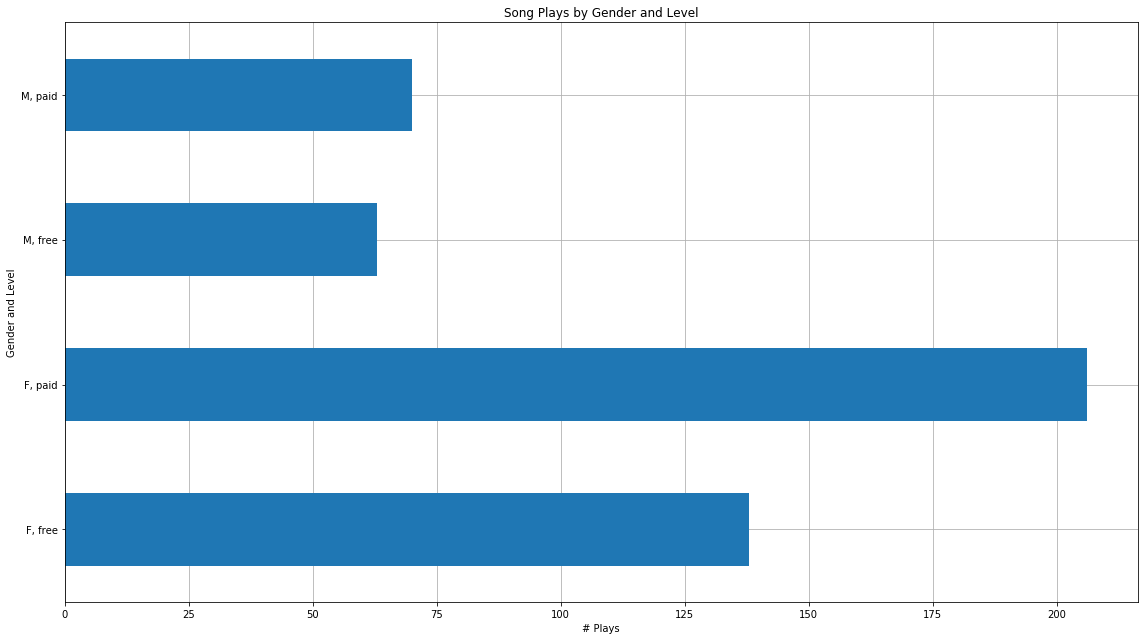

In [137]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()

pd.read_sql(query, conn).plot(kind="barh", x="gender_level", legend=None, ax=ax, zorder=2)
ax.grid(True, zorder=0)
ax.set_xlabel("# Plays")
ax.set_ylabel("Gender and Level")
ax.set_title("Song Plays by Gender and Level")

plt.tight_layout()
plt.savefig("../songplays_by_gender_and_level.png", dpi=120)

In [138]:
query = """
select time.hour,
       count(songplays.songplay_id) as count_songplays
  from songplays
  left join time
    on songplays.start_time = time.start_time
 group by hour
 order by hour;
"""

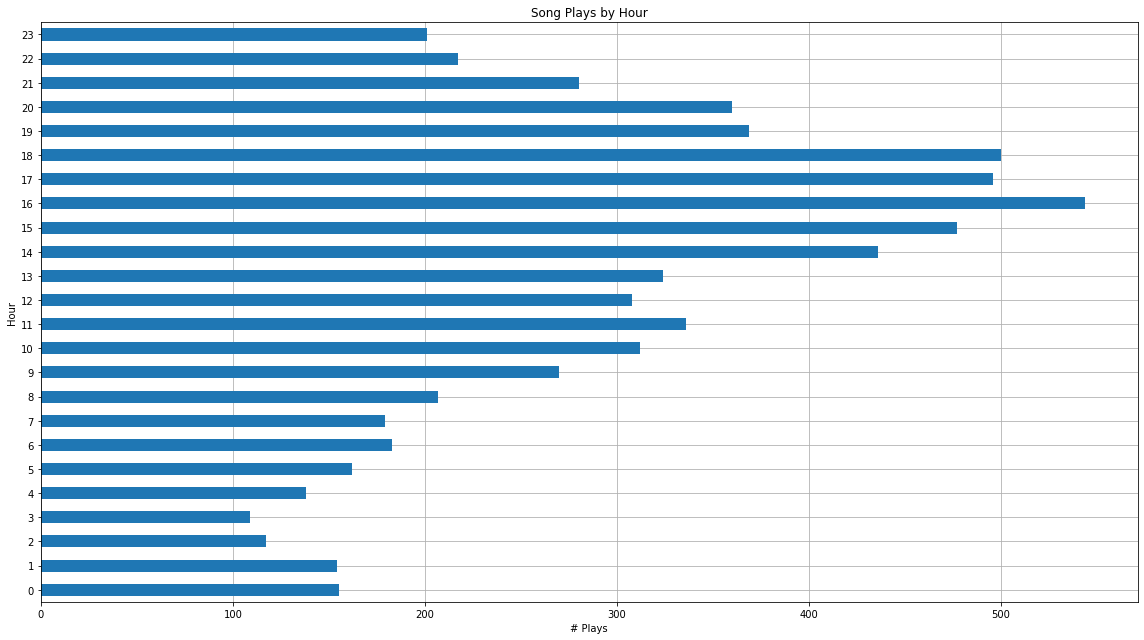

In [77]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()

pd.read_sql(query, conn).plot(kind="barh", x="hour", legend=None, ax=ax, zorder=2)
ax.grid(True, zorder=0)
ax.set_xlabel("# Plays")
ax.set_ylabel("Hour")
ax.set_title("Song Plays by Hour")

plt.tight_layout()
plt.savefig("../songplays_by_hour.png", dpi=120)

In [122]:
conn.close()